## Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## 1. Загрузка и предварительная обработка данных

In [2]:
# Загрузить данные

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
df = pd.read_csv(url, header=None)

# Переименовать столбцы

df.columns = ["variance", "skewness", "curtosis", "entropy", "class"]
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
# Разделение функций и меток

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Нормализация данных

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделите данные на обучающий и тестовый наборы

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Реализовать модель логистической регрессии со следующими функциями потерь:
а) Logistic loss б) Adaboost loss в) binary crossentropy

In [4]:
# Модель логистической регрессии с потерей логистики
logistic_model = LogisticRegression(penalty='none', solver='lbfgs')
logistic_model.fit(X_train, y_train)

# Модель логистической регрессии с потерями Adaboost
adaboost_model = AdaBoostClassifier(base_estimator=LogisticRegression(penalty='none', solver='lbfgs'), n_estimators=50, learning_rate=1)
adaboost_model.fit(X_train, y_train)

# Модель логистической регрессии с бинарными потерями кроссэнтропии
binary_model = Sequential()
binary_model.add(Dense(1, input_dim=4, activation='sigmoid'))
binary_model.compile(loss='binary_crossentropy', optimizer='adam')
binary_model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8999
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8762
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8539
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8329
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.8128
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7936
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7754
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7581
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7416
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7255
Epoch 11/100
30/30 [==============================] - 0s 1ms/step - loss: 0.7103
Epoch 12/100
30/30 [==============================] - 0s 1ms/step - loss: 0.6957
Epoch 13/100
30/30 [=================

## 3. Визуализировать кривые обучения модели бинарной классфикации в виде динамики изменения каждой из функций ошибок п.2 на тренировочной и тестовой выборках.

In [5]:
# Функции потерь для всех трех моделей
logistic_train_loss = []
logistic_test_loss = []
adaboost_train_loss = []
adaboost_test_loss = []
binary_train_loss = []
binary_test_loss = []

# Вычислить функции потерь для каждой модели
for i in range(100):
    # Логистическая регрессия с логистическими потерями
    logistic_model.fit(X_train, y_train)
    logistic_train_loss.append(logistic_model.score(X_train, y_train))
    logistic_test_loss.append(logistic_model.score(X_test, y_test))

    # Логистическая регрессия с потерями Adaboost
    adaboost_model.fit(X_train, y_train)
    adaboost_train_loss.append(adaboost_model.score(X_train, y_train))
    adaboost_test_loss.append(adaboost_model.score(X_test, y_test))

    # Логистическая регрессия с бинарными потерями кроссэнтропии
    binary_model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)
    binary_train_loss.append(binary_model.evaluate(X_train, y_train, verbose=0))
    binary_test_loss.append(binary_model.evaluate(X_test, y_test, verbose=0))

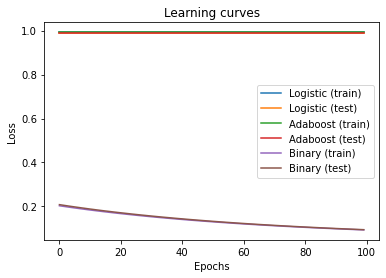

In [6]:
# Отображение кривых обучения для каждой модели
plt.plot(logistic_train_loss, label='Logistic (train)')
plt.plot(logistic_test_loss, label='Logistic (test)')
plt.plot(adaboost_train_loss, label='Adaboost (train)')
plt.plot(adaboost_test_loss, label='Adaboost (test)')
plt.plot(binary_train_loss, label='Binary (train)')
plt.plot(binary_test_loss, label='Binary (test)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning curves')
plt.legend()
plt.show()

## 4. Сравнение качества классификации в терминах метрики точности для каждой модели:

In [7]:
# Вычислить показатели точности для каждой модели.

logistic_accuracy = accuracy_score(y_test, logistic_model.predict(X_test))
adaboost_accuracy = accuracy_score(y_test, adaboost_model.predict(X_test))
binary_accuracy = accuracy_score(y_test, (binary_model.predict(X_test) > 0.5).astype(int))

# Вывести метрики точности для каждой модели.

print("Accuracy for logistic loss:", logistic_accuracy)
print("Accuracy for Adaboost loss:", adaboost_accuracy)
print("Accuracy for binary crossentropy loss:", binary_accuracy)

13/13 [==============================] - 0s 904us/step
Accuracy for logistic loss: 0.9902912621359223
Accuracy for Adaboost loss: 0.9902912621359223
Accuracy for binary crossentropy loss: 0.9805825242718447
